In [1]:
import nbsetup
import numpy as np
import ergodicpy as ep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
def analyse(o_range, trials=1, b_max=5, func=lambda o,x: np.random.random(o)):
    data = []
    minn = []
    maxx = []
    ecs = {}
    for o in o_range:
        nbsetup.cp(o)
        ecs[o] = []
        for t in range(trials):
            x = np.random.random(o)
            y = func(o, x)
            ec = ep.ErgodicCorrelation(x, y)
            
            # minn is found automatically
            ms = ec.correlations.copy()
            ms['o'] = o
            ms['b'] = len(ec.bins)-1
            ms['e'] = ec.ensemble_count
            minn.append(ms)
            ecs[o].append(ec)
            
            # then range
            for b in ep.binint(5, int(o/b_max)):
                ec.update_bins(b)
                ms = ec.correlations.copy()
                ms['o'] = o
                ms['b'] = b
                ms['e'] = ec.ensemble_count
                data.append(ms)
            
            # maxx is the final
            maxx.append(ms)
    
    df = pd.DataFrame(data=data)
    maxx_df = pd.DataFrame(data=maxx)
    minn_df = pd.DataFrame(data=minn)
    
    keys = ('complexity', 'c2', 'alt2')
    fig, axes = plt.subplots(3, len(keys), sharex=True, sharey=False, figsize=(15,20))
    pal = 'Spectral'#'icefire'

    
    for i, key in enumerate(keys):
        # scatter
        g = sns.scatterplot(data=df, x='o', y=key, hue='b', ax=axes[0][i], legend= i == 1, palette=pal)
        g.set(ylabel=None, xlabel=None, ylim=(0,None), title=key)
        
        # minn & max
        sns.lineplot(data=maxx_df, x='o', y=key, ax=axes[1][i])
        g = sns.lineplot(data=minn_df, x='o', y=key, ax=axes[1][i])
        g.set(ylim=(0,None))
        
        # bins
        sns.lineplot(data=df, x='o', y='e', ax=axes[2][i])
        
    return df, ecs, fig

2000


/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


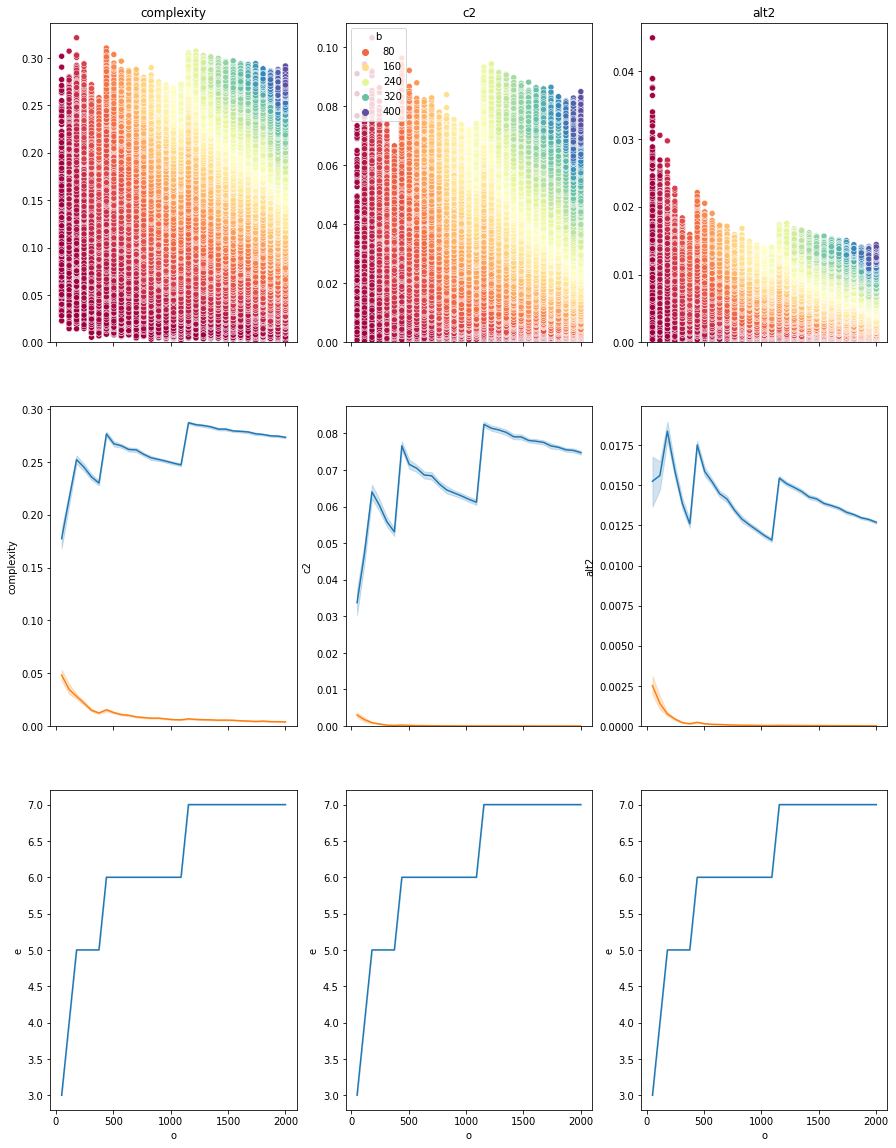

In [147]:
b = analyse(ep.binint(50,2000,30), 100)

200


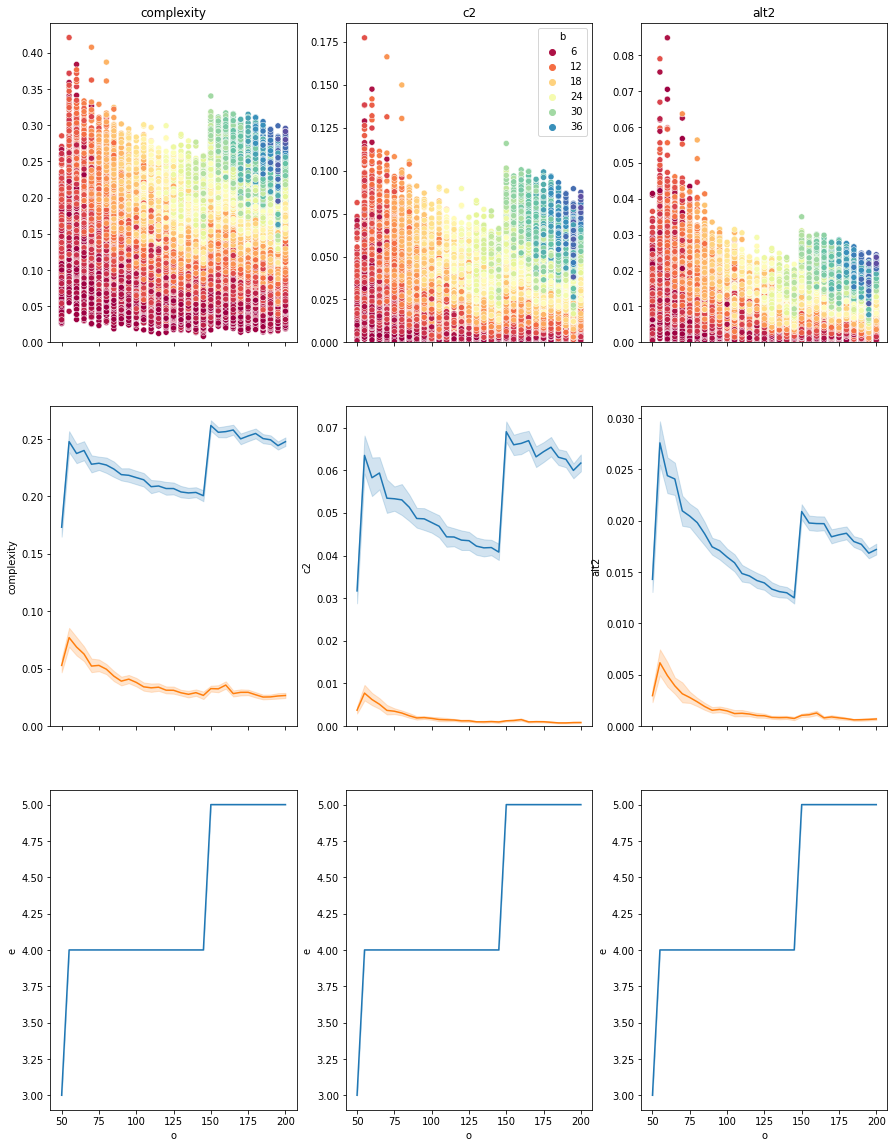

In [148]:
b = analyse(ep.binint(50,200,30), 100)

200


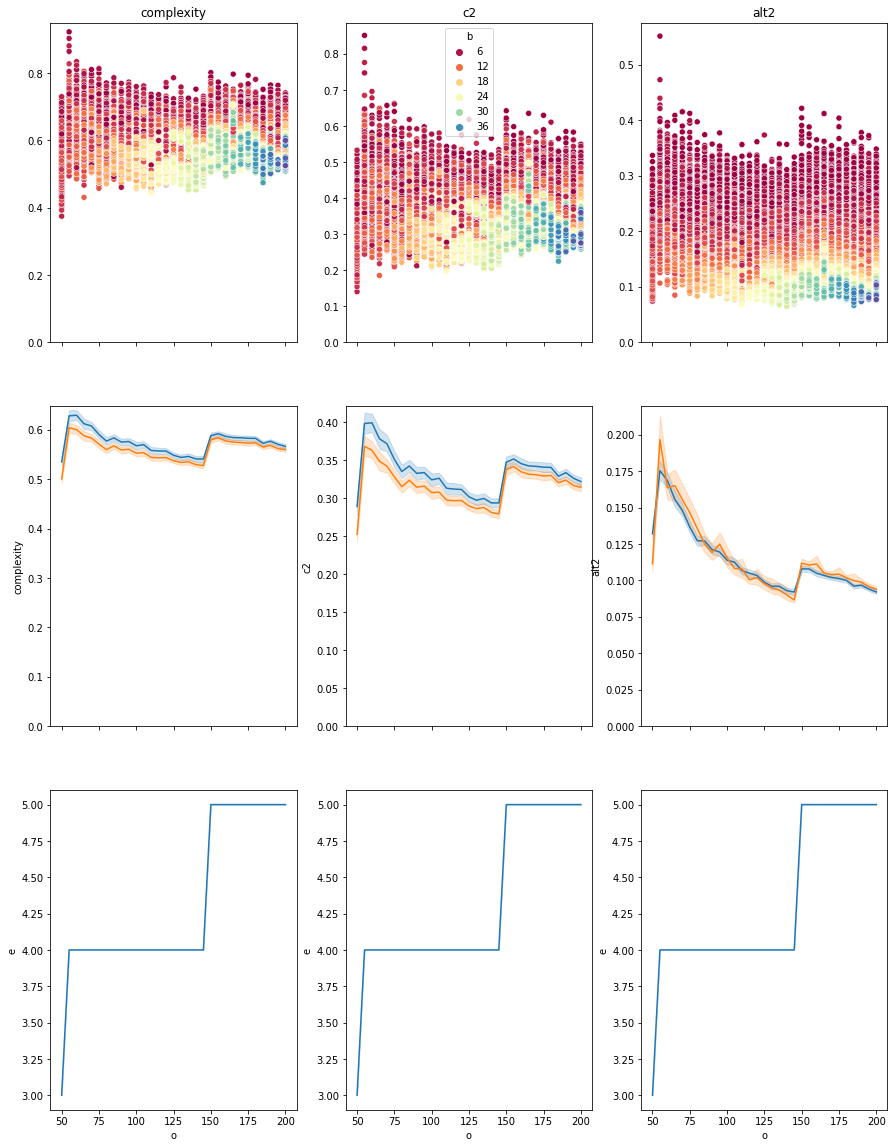

In [149]:
b = analyse(ep.binint(50,200,30), 100, func=lambda o,x: x+np.random.normal(0,0.1,o))

2000


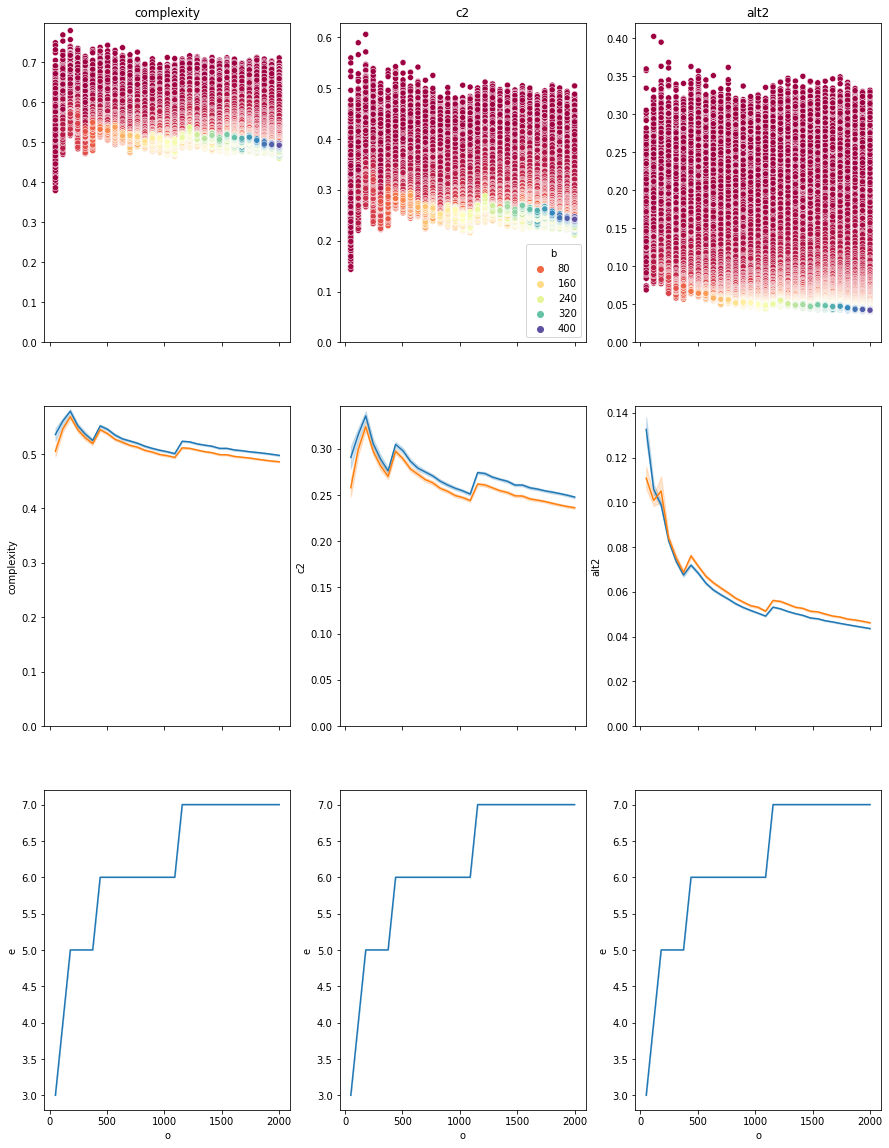

In [150]:
b = analyse(ep.binint(50,2000,30), 100, func=lambda o,x: x+np.random.normal(0,0.1,o))